In [1]:
%matplotlib inline

In [2]:
from collections import OrderedDict
import numpy as np
from losspager.models.emploss import EmpiricalLoss
from losspager.vis.impactscale import drawImpactScale
import os.path
from pprint import PrettyPrinter

Uncertainties in PAGER are calculated using the L2G statistic for the fatality and economic loss models. This statistic is defined in Equation 4 in:

"An Empirical Model for Global Earthquake Fatality Estimation", Jaiswal et al., 2010. http://earthquake.usgs.gov/data/pager/prodandref/Jaiswal_&_Wald_(2010)_Empirical_Fatality_Model.pdf

The L2G values for each of the country models can be found in the XML files containing the theta and beta values for each model.

In [3]:
fatfile = os.path.join(os.getcwd(),'..','test','data','fatality.xml')
empfat = EmpiricalLoss.loadFromXML(fatfile)
ecofile = os.path.join(os.getcwd(),'..','test','data','economy.xml')
empeco = EmpiricalLoss.loadFromXML(ecofile)

When we have losses from more than one country, as below, we combine the G values for all countries contributing to losses with the following algorithm:

min(2.5,sqrt(sum(allGValues^2))

where: 
 
 * allGValues is an array of G values for country models that contributed to total loss.
 
NB: If there are no losses from any country, then G values for all country models with population exposure will be combined.

Combined G value = 2.50


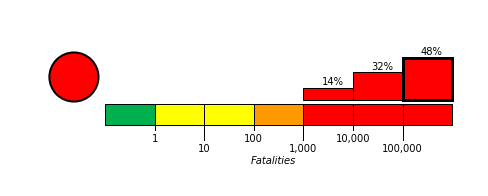

In [4]:
lossdict = {'AF':1e5,
            'PK':1e4}
G = empfat.getCombinedG(lossdict)
print('Combined G value = %.2f' % G)
probs = empfat.getProbabilities(lossdict,G)
f = drawImpactScale(probs,'fatality')

1.426483
1.482544
Combined G value = 2.06


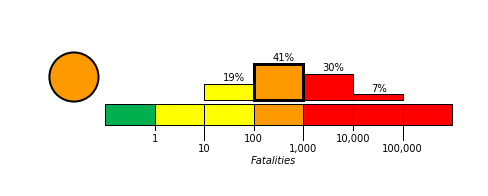

In [5]:
lossdict = {'PE':156,
            'EC':345}
print(empfat.getModel('PE').l2g)
print(empfat.getModel('EC').l2g)
G = empfat.getCombinedG(lossdict)
print('Combined G value = %.2f' % G)
probs = empfat.getProbabilities(lossdict,G)
f = drawImpactScale(probs,'fatality')

1.53615
2.06714
Combined G value = 2.50


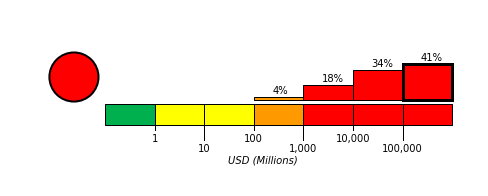

In [6]:
lossdict = {'US':63.7e9,
           'MX':2.4e9}
print(empeco.getModel('US').l2g)
print(empeco.getModel('MX').l2g)
G = empeco.getCombinedG(lossdict)
print('Combined G value = %.2f' % G)
probs = empeco.getProbabilities(lossdict,G)
f = drawImpactScale(probs,'economic')

2.5
Combined G value = 2.50


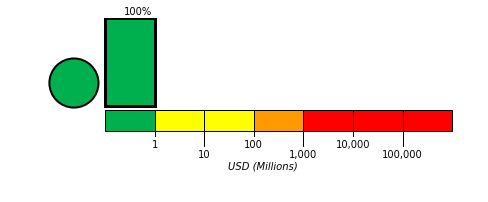

In [7]:
lossdict = {'WU':3500} #3,500 *dollars*
print(empeco.getModel('WU').l2g)
G = empeco.getCombinedG(lossdict)
print('Combined G value = %.2f' % G)
probs = empeco.getProbabilities(lossdict,G)
f = drawImpactScale(probs,'economic')

The cell below encapsulates the results from a scenario in Clackamas County, Oregon.

Western US fatalities: 0
G(fatalities) = 1.41
G(economic) = 2.50
Western US dollar losses: 3551


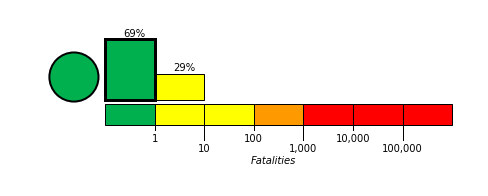

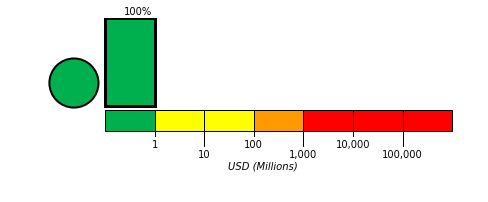

In [8]:
#Array of population exposure to shaking
expdict = {'WU':np.array([0,0,1933176.0,2091344.0,1545984.0,872.0,0,0,0,0])}
fatdict = empfat.getLosses(expdict)
Gf = empfat.getCombinedG(fatdict)
print('Western US fatalities: %i' % fatdict['WU'])
print('G(fatalities) = %.2f' % Gf)
fatprobs = empfat.getProbabilities(fatdict,Gf)
f = drawImpactScale(fatprobs,'fatality')

#Array of economic exposure to shaking
ecoexpdict = {'WU':np.array([0,0,1.26209480726e+12,1.36535649243e+12,1.00931233292e+12,2527876972.26,0,0,0,0])}
ecodict = empeco.getLosses(ecoexpdict)
Ge = empeco.getCombinedG(ecodict)
print('G(economic) = %.2f' % Ge)
print('Western US dollar losses: %i' % ecodict['WU'])
ecoprobs = empeco.getProbabilities(ecodict,Ge)
f = drawImpactScale(ecoprobs,'economic')